In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("cleaned_autos.csv")

In [4]:
pd.set_option('display.max_columns', None)
df.head(3)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen,yearOfCreation,yearCrawled,monthOfCreation,monthCrawled,NoOfDaysOnline,NoOfHrsOnline,yearsOld,monthsOld
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Offer,480,test,Other,1993,manuell,0,golf,150000,Jan,Gasoline,volkswagen,Other,2016-03-24 00:00:00,70435,2016-04-07 03:16:57,2016,2016,March,March,14,3,23,11
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Offer,18300,test,coupe,2011,manuell,190,Other,125000,May,Diesel,audi,Yes,2016-03-24 00:00:00,66954,2016-04-07 01:46:50,2016,2016,March,March,14,1,5,7
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Offer,9800,test,suv,2004,automatik,163,grand,125000,Aug,Diesel,jeep,Other,2016-03-14 00:00:00,90480,2016-04-05 12:47:46,2016,2016,March,March,22,12,12,4


In [5]:
df.shape

(313687, 27)

In [4]:
df.vehicleType.unique()

array(['Other', 'coupe', 'suv', 'kleinwagen', 'limousine', 'cabrio',
       'kombi', 'bus', 'andere'], dtype=object)

## Variation of the price range by the vehicle type

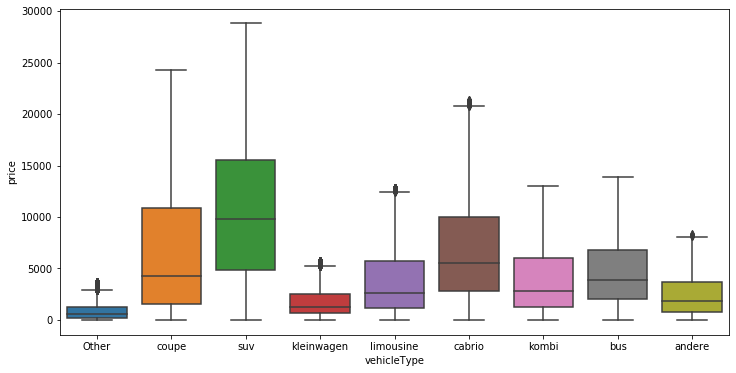

In [5]:
fig, ax = plt.subplots(figsize=(12,6))
sns.boxplot(x="vehicleType", y="price", data=df)
plt.show()

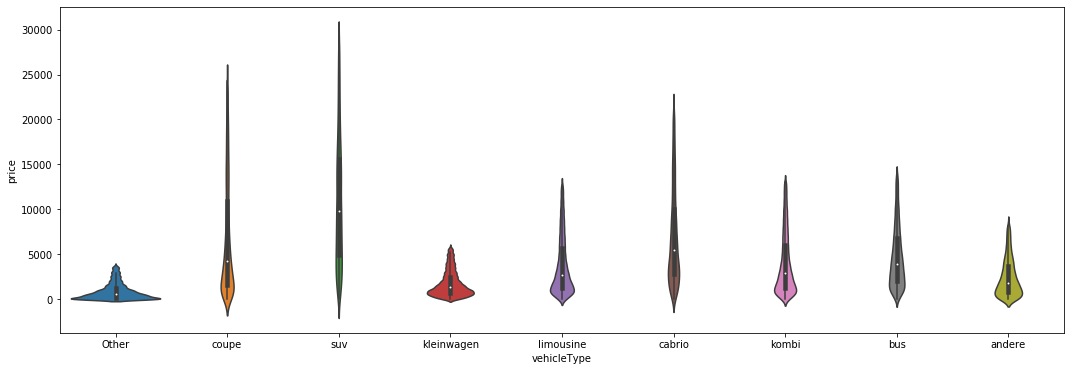

In [5]:
fig, ax = plt.subplots(figsize=(18,6))
sns.violinplot(x="vehicleType", y="price", data=df)
plt.show()

## Demonstration of the mean pricec by the vehicle type

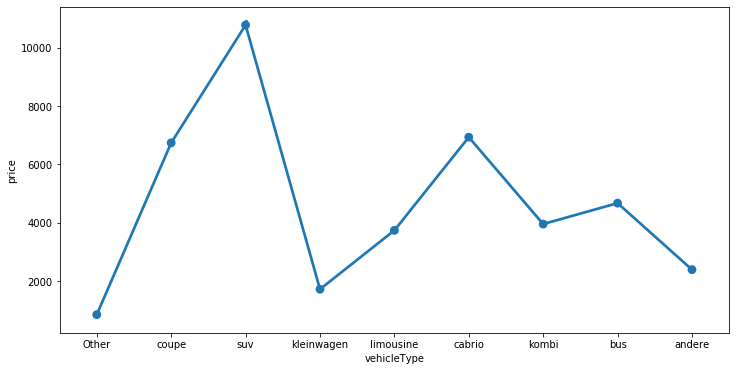

In [6]:
fig, ax = plt.subplots(figsize=(12,6))
sns.pointplot(x="vehicleType", y="price", data=df)
#ax.set_xticklabels(df.vehicleType.unique(), rotation=90);

In [15]:
order=df.groupby("vehicleType").price.mean().sort_values(ascending=False).index

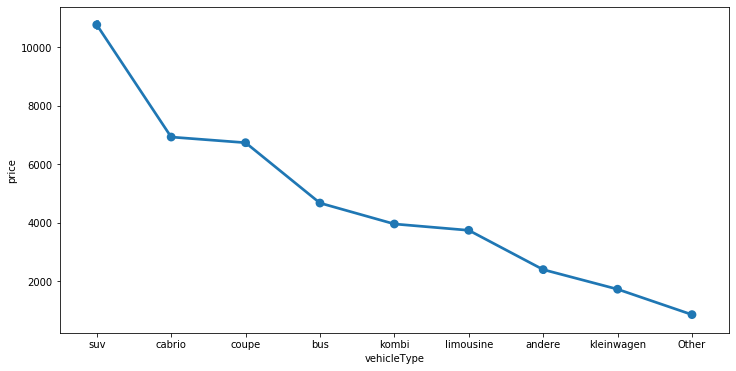

In [16]:
fig, ax = plt.subplots(figsize=(12,6))
sns.pointplot(x="vehicleType", y="price", order=order, data=df)

## Total count of vehicles by type available on ebay for sale

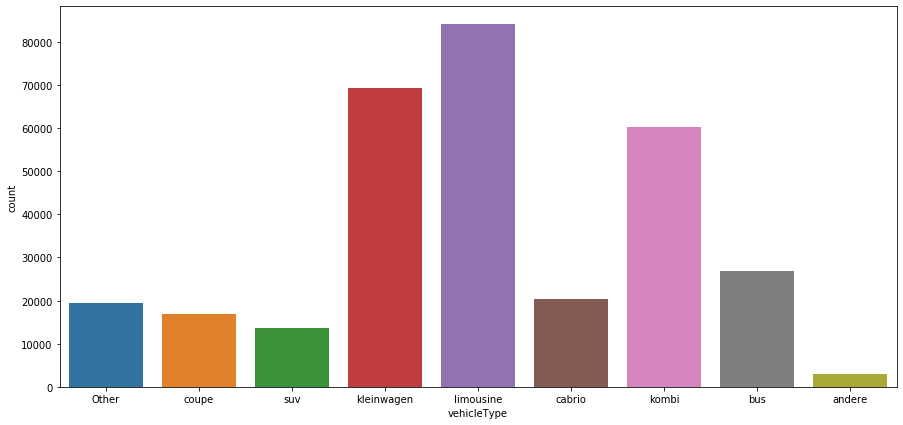

In [17]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.countplot(df.vehicleType)

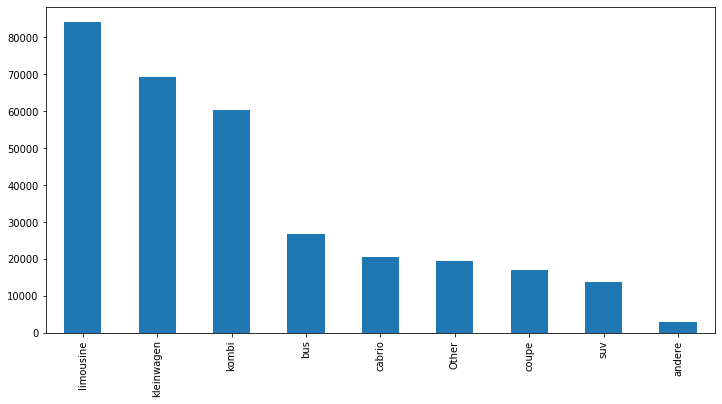

In [18]:
#pandas
df.vehicleType.value_counts().plot.bar(figsize=(12,6))

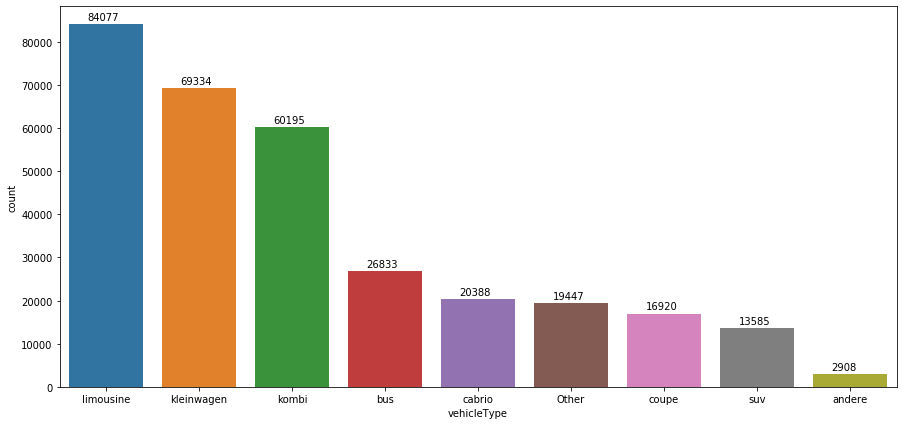

In [30]:
fig, ax = plt.subplots(figsize=(15, 7))
g=sns.countplot(df.vehicleType, order=df.vehicleType.value_counts().index)

for p in g.patches:
    g.annotate((p.get_height()), (p.get_x()+0.2, p.get_height()+1000))

In [22]:
x=df.vehicleType.value_counts()

In [23]:
x.index

Index(['limousine', 'kleinwagen', 'kombi', 'bus', 'cabrio', 'Other', 'coupe',
       'suv', 'andere'],
      dtype='object')

In [24]:
x.values

array([84077, 69334, 60195, 26833, 20388, 19447, 16920, 13585,  2908],
      dtype=int64)

<BarContainer object of 9 artists>

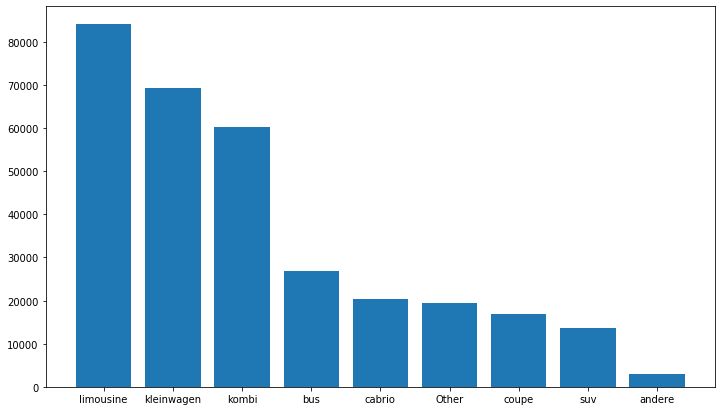

In [25]:
fig, ax = plt.subplots(figsize=(12,7))
ax.bar(x.index, x.values)

## Average price for vehicles based on the type of vehicle as well as on the type of gearbox

In [6]:
df.head(2)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen,yearOfCreation,yearCrawled,monthOfCreation,monthCrawled,NoOfDaysOnline,NoOfHrsOnline,yearsOld,monthsOld
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Offer,480,test,Other,1993,manuell,0,golf,150000,Jan,Gasoline,volkswagen,Other,2016-03-24 00:00:00,70435,2016-04-07 03:16:57,2016,2016,March,March,14,3,23,11
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Offer,18300,test,coupe,2011,manuell,190,Other,125000,May,Diesel,audi,Yes,2016-03-24 00:00:00,66954,2016-04-07 01:46:50,2016,2016,March,March,14,1,5,7


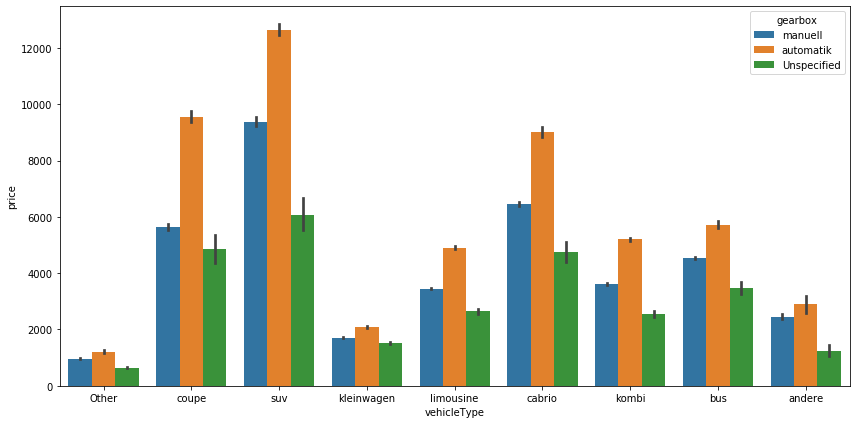

In [10]:
plt.figure(figsize=(12,6))
sns.barplot(x="vehicleType", y="price", hue="gearbox", data=df)
plt.tight_layout()

## Average price of vehicle by fuel type as well as on the type of gearbox

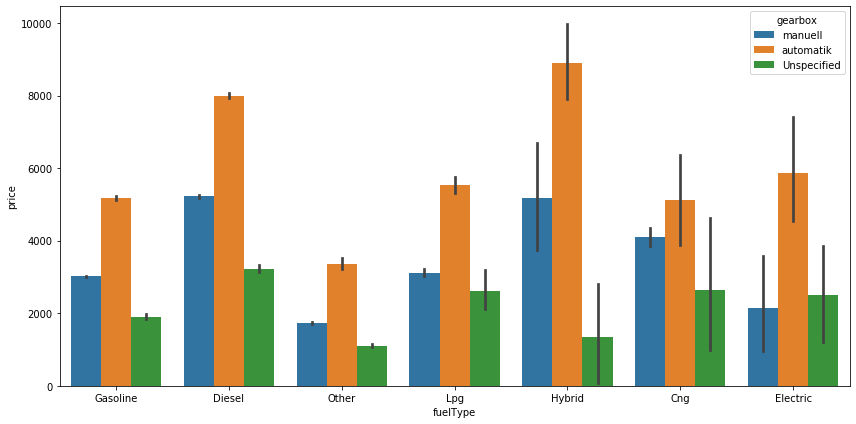

In [12]:
plt.figure(figsize=(12,6))
sns.barplot(x="fuelType", y="price", hue="gearbox", data=df)
plt.tight_layout()

# heatmap

In [13]:
trial = pd.DataFrame()
for b in list(df["brand"].unique()):
    for v in list(df["vehicleType"].unique()):
        z = df[(df["brand"] == b) & (df["vehicleType"] == v)]["price"].mean()
        trial = trial.append(pd.DataFrame({'brand':b , 'vehicleType':v , 'avgPrice':z}, index=[0]))
trial = trial.reset_index()
del trial["index"]
trial["avgPrice"].fillna(0,inplace=True)
trial["avgPrice"].isnull().value_counts()
trial["avgPrice"] = trial["avgPrice"].astype(int)
trial.head(5)

,brand,vehicleType,avgPrice
0,volkswagen,Other,897
1,volkswagen,coupe,8014
2,volkswagen,suv,13946
3,volkswagen,kleinwagen,1626
4,volkswagen,limousine,3743


In [14]:
# HeatMap tp show average prices of vehicles by brand and type together
tri = trial.pivot("brand","vehicleType", "avgPrice")

In [15]:
tri.head()

vehicleType,Other,andere,bus,cabrio,coupe,kleinwagen,kombi,limousine,suv
brand,,,,,,,,,
alfa_romeo,669,962,0,7035,5265,1867,3312,2600,0
audi,1012,2685,3485,9655,11242,2582,5442,3829,18644
bmw,896,1720,4064,8613,6375,1575,5030,4838,12868
chevrolet,1250,3059,5188,10590,9991,2588,4143,4944,9613
chrysler,915,2919,2395,4160,8194,1666,3930,3191,5888


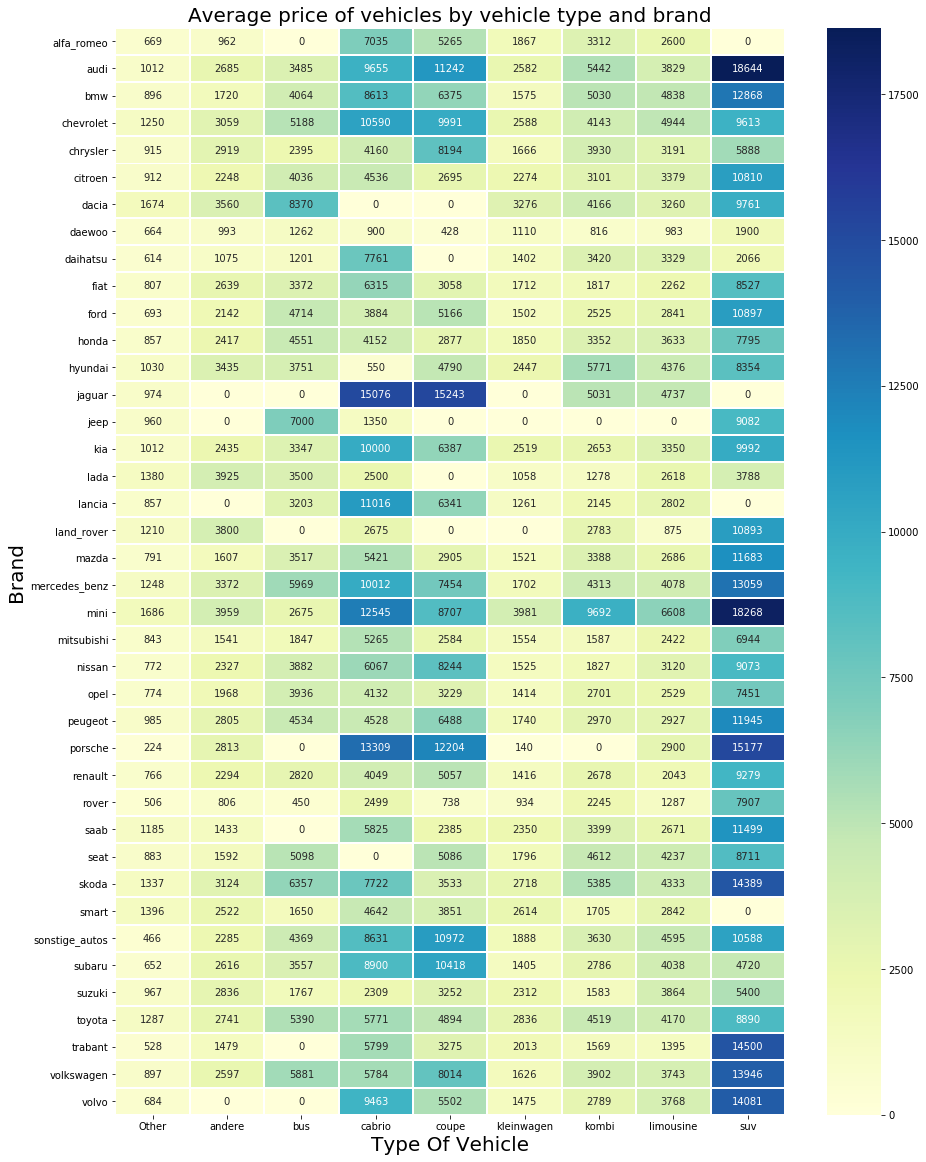

In [14]:
fig, ax = plt.subplots(figsize=(15,20))
sns.heatmap(tri,linewidths=1,cmap="YlGnBu",annot=True, ax=ax, fmt="d")
ax.set_title("Average price of vehicles by vehicle type and brand",fontdict={'size':20})
ax.xaxis.set_label_text("Type Of Vehicle",fontdict= {'size':20})
ax.yaxis.set_label_text("Brand",fontdict= {'size':20})
plt.show()

In [9]:
df.groupby(['brand','vehicleType'])[['price']].aggregate('mean')  # just to see, no need. We will not use.

price
brand      vehicleType              
alfa_romeo Other          669.805556
           andere         962.500000
           cabrio        7035.727778
           coupe         5265.458874
           kleinwagen    1867.865248
...                              ...
volvo      coupe         5502.100000
           kleinwagen    1475.000000
           kombi         2789.709828
           limousine     3768.010084
           suv          14081.237918

[333 rows x 1 columns]

In [ ]:
# attention: we don't use the code above (groupby and agg func.) Because pivot_table has aggfunction as "mean" by default.

In [12]:
tri=df.pivot_table('price', index = 'brand', columns = 'vehicleType')
tri

vehicleType,Other,andere,bus,cabrio,coupe,kleinwagen,kombi,limousine,suv
brand,,,,,,,,,
alfa_romeo,669.805556,962.500000,NaN,7035.727778,5265.458874,1867.865248,3312.968680,2600.240964,0.000000
audi,1012.599251,2685.311828,3485.000000,9655.285628,11242.325869,2582.206074,5442.982216,3829.821096,18644.243902
bmw,896.748086,1720.388393,4064.000000,8613.779584,6375.995227,1575.313070,5030.383186,4838.119115,12868.142412
chevrolet,1250.135593,3059.590909,5188.013699,10590.294118,9991.757895,2588.882239,4143.609524,4944.031818,9613.550505
chrysler,915.701299,2919.714286,2395.083333,4160.719665,8194.000000,1666.444444,3930.567686,3191.585455,5888.391304
citroen,912.367647,2248.972727,4036.490718,4536.408696,2695.552632,2274.683580,3101.815182,3379.148256,10810.540541
dacia,1674.875000,3560.000000,8370.729167,NaN,NaN,3276.289474,4166.642857,3260.578431,9761.972093
daewoo,664.204082,993.800000,1262.777778,900.000000,428.625000,1110.324627,816.340426,983.981308,1900.000000
daihatsu,614.675676,1075.000000,1201.500000,7761.000000,NaN,1402.864245,3420.294118,3329.543478,2066.918367


In [13]:
tri.fillna(0,inplace=True)

In [14]:
tri = tri.astype(int)

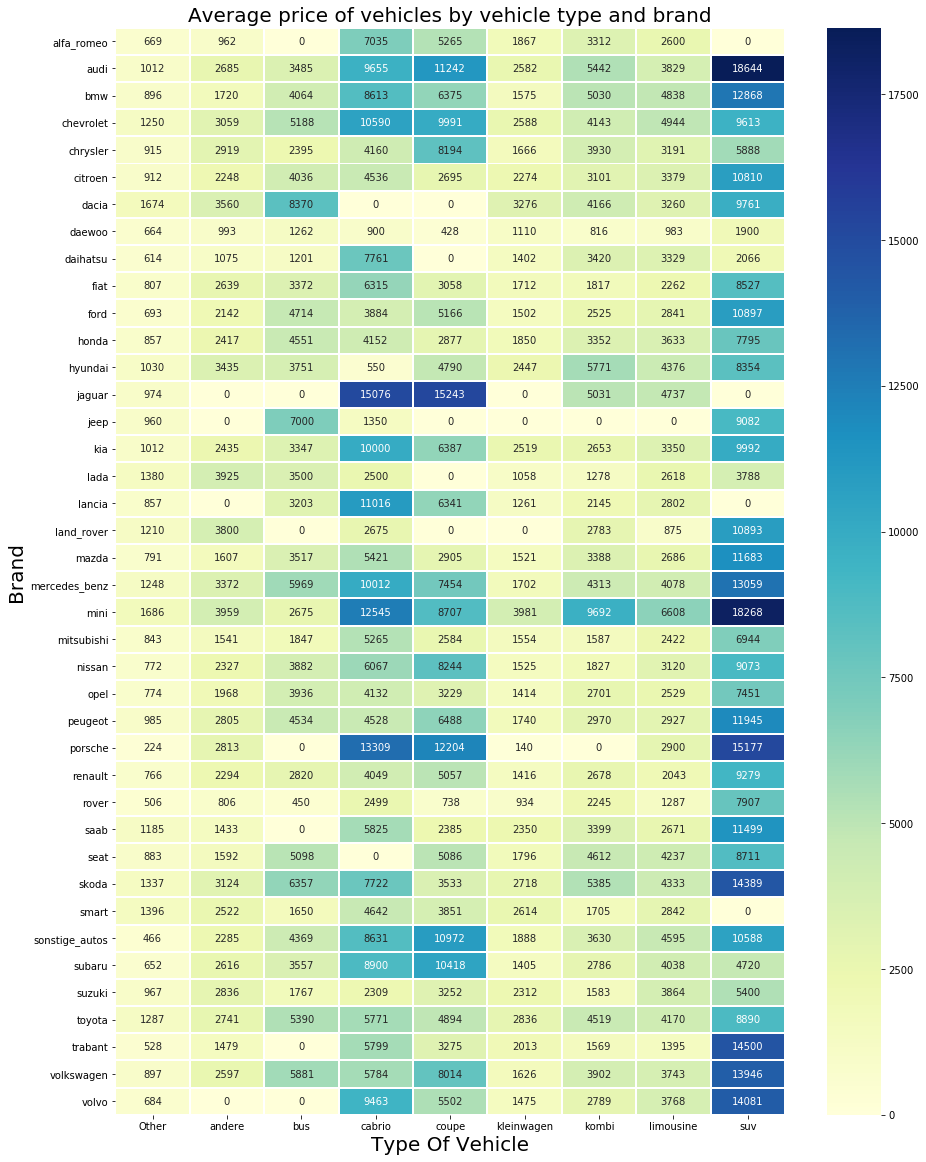

In [15]:
fig, ax = plt.subplots(figsize=(15,20))
sns.heatmap(tri,linewidths=1,cmap="YlGnBu",annot=True, fmt="d")
ax.set_title("Average price of vehicles by vehicle type and brand",fontdict={'size':20})
ax.set_xlabel("Type Of Vehicle",fontdict= {'size':20})
ax.set_ylabel("Brand",fontdict= {'size':20});